<a href="https://colab.research.google.com/github/rebecabarroso/matriculas/blob/main/matriculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Matrículas no município de Maceió por rede e tipo de ensino - 2007 a 2022**


1. Importação das bibliotecas

In [2]:
# importando os pacotes
# pandas para tratamento de dados
import pandas as pd
import numpy as np

# matplotlib.pyplot para fazer gráficos
import matplotlib.pyplot as plt

# io para entrada e saída de documentos
import io

# seaborn para fazer gráficos boxplot
import seaborn as sbrn

2. Importação da base de dados

In [4]:
# denominando o nome do arquivo
matriculas = ('/content/drive/MyDrive/Trabalho Métodos Quantitativos/matriculas.csv')

In [6]:
# importando o arquivo através da máquina
from google.colab import files
arquivos = files.upload()

Saving matriculas.csv to matriculas.csv


3. Comandos básicos

In [7]:
# transformar num dataframe
matriculas = pd.read_csv(io.StringIO(arquivos['matriculas.csv'].decode('utf-8')))
df = pd.read_csv('matriculas.csv')

In [8]:
# mostrar as primeiras 5 linhas
df.head(5)

,_id,co_mun,no_mun,ano,variavel,ensino_rede,ensino_tipo,valor
0,16721,2704302,Maceió,2007,Matrícula,Estadual,Educação de Jovens e Adultos (EJA),11283.0
1,16722,2704302,Maceió,2007,Matrícula,Estadual,Educação Infantil,410.0
2,16723,2704302,Maceió,2007,Matrícula,Estadual,Ensino Fundamental,68064.0
3,16724,2704302,Maceió,2007,Matrícula,Estadual,Ensino Médio,32364.0
4,16725,2704302,Maceió,2007,Matrícula,Estadual,Educação Profissional,1622.0


In [9]:
# mostrar as últimas 5 linhas
df.tail(5)

,_id,co_mun,no_mun,ano,variavel,ensino_rede,ensino_tipo,valor
395,17191,2704302,Maceió,2022,Matrícula,Pública,Educação de Jovens e Adultos (EJA),16639.0
396,17192,2704302,Maceió,2022,Matrícula,Pública,Educação Infantil,10613.0
397,17193,2704302,Maceió,2022,Matrícula,Pública,Ensino Fundamental,68280.0
398,17194,2704302,Maceió,2022,Matrícula,Pública,Ensino Médio,22711.0
399,17195,2704302,Maceió,2022,Matrícula,Pública,Educação Profissional,7063.0


In [10]:
# verificar o número de linhas e colunas
df.shape


(400, 8)

In [11]:
# verificar a existência de missing values
df.isnull().sum()

_id            0
co_mun         0
no_mun         0
ano            0
variavel       0
ensino_rede    0
ensino_tipo    0
valor          0
dtype: int64

**4. Análise de dados**

4.1. Variáveis categóricas

In [12]:
import statistics
# variáveis categóricas
# quantas vezes aparecem as matrículas por tipo de ensino?
df['ensino_rede'].value_counts()

Estadual     80
Federal      80
Municipal    80
Privada      80
Pública      80
Name: ensino_rede, dtype: int64

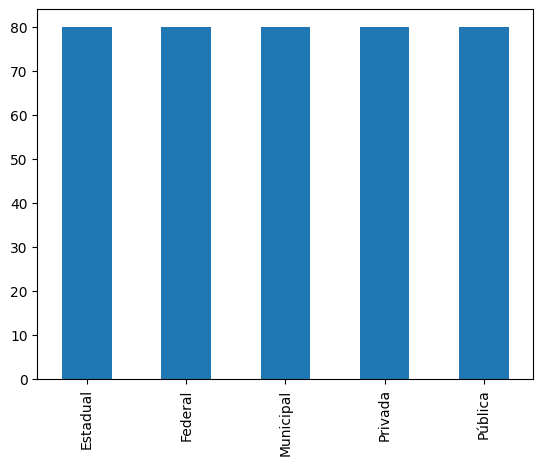

In [13]:
# mostrando as frequências através de um gráfico de barras
df['ensino_rede'].value_counts().plot(kind='bar')
plt.show()


4.2. Variáveis numéricas

In [14]:
# variáveis numéricas
# mostrando as estatíticas descritivas das variáveis quantitativas
df.describe()

,_id,co_mun,ano,valor
count,400.000000,400.0,400.000000,400.00000
mean,16958.000000,2704302.0,2014.500000,14329.83000
std,138.654472,0.0,4.615545,20760.47478
min,16721.000000,2704302.0,2007.000000,0.00000
25%,16839.500000,2704302.0,2010.750000,1026.00000
50%,16958.000000,2704302.0,2014.500000,6968.00000
75%,17076.500000,2704302.0,2018.250000,18812.00000
max,17195.000000,2704302.0,2022.000000,120963.00000


In [16]:
# mostrando a média separadamente
df = pd.read_csv('matriculas.csv')
df['valor'].describe()['mean']

14329.83

4.3. Boxplot com tipo de ensino e valor

<bound method Figure.show of <Figure size 1500x700 with 1 Axes>>

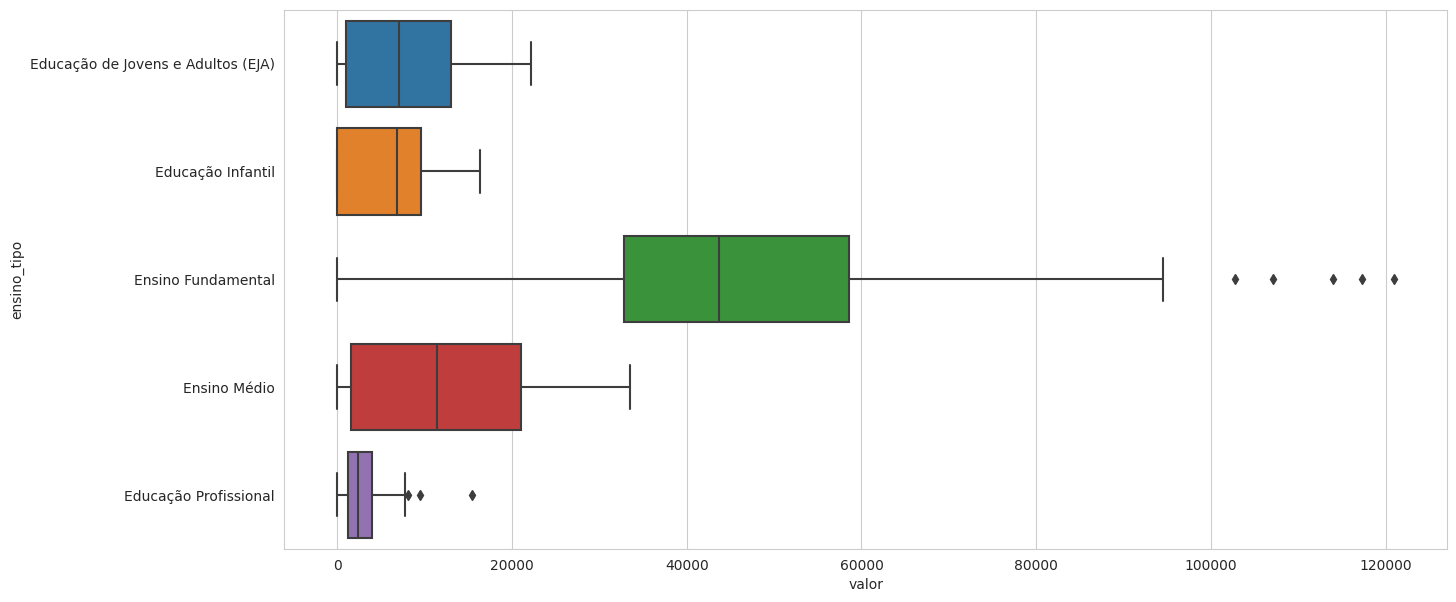

In [17]:
# construindo um bloxplot relacionando valor e tipo de ensino
sbrn.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sbrn.boxplot (y=df['ensino_tipo'], x=df['valor'])
fig.show


4.4. Gráfico de densidade

In [18]:
# quantas vezes aparecem os tipos de ensino na base de dados?
df.ensino_tipo.value_counts()

Educação de Jovens e Adultos (EJA)    80
Educação Infantil                     80
Ensino Fundamental                    80
Ensino Médio                          80
Educação Profissional                 80
Name: ensino_tipo, dtype: int64

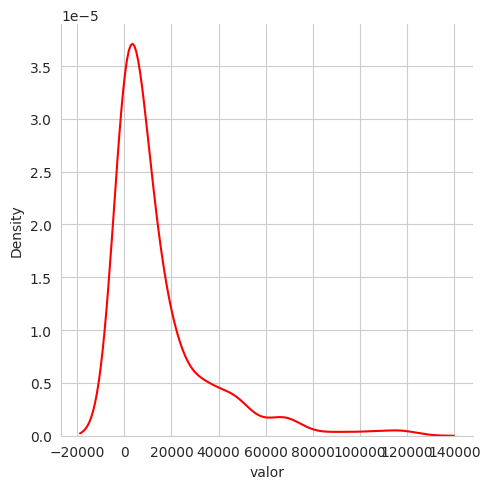

In [19]:
# construindo a curva de densidade de distribuição dos valores entre 2007 e 2022
sbrn.displot(df['valor'], kind='kde', color = 'red')

<Axes: xlabel='valor', ylabel='Density'>

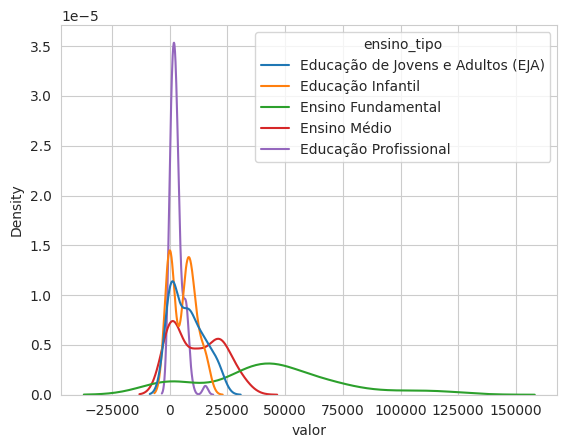

In [20]:
# relacionando duas variáveis em um gráfico de densidade
sbrn.kdeplot(data=df, x='valor', hue='ensino_tipo')

<ipython-input-21-b486ea87b4a1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbrn.kdeplot(data=df, x='valor', hue='ensino_tipo', shade=True)


<Axes: xlabel='valor', ylabel='Density'>

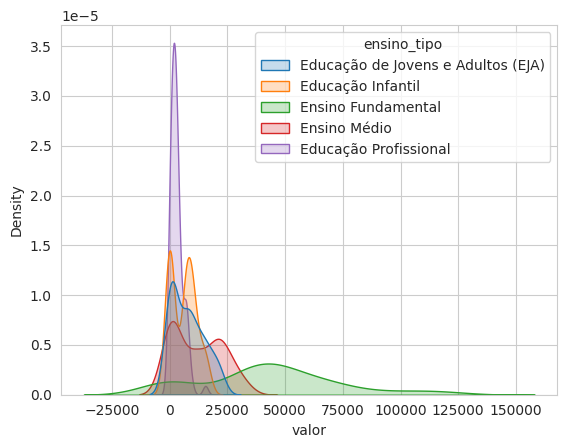

In [21]:
# adicionando sombreamento
sbrn.kdeplot(data=df, x='valor', hue='ensino_tipo', shade=True)

4.5. Comparativo por ano de matrícula

In [22]:
# comparando os valores por ano
df['valor'].groupby(by=df['ano']).describe()

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
2007,25.0,16667.32,27992.220953,0.0,1095.0,6667.0,17950.0,120963.0
2008,25.0,16526.12,26988.262743,0.0,1207.0,7764.0,19614.0,117317.0
2009,25.0,16194.12,26366.970239,0.0,1062.0,6927.0,18173.0,114004.0
2010,25.0,15525.80,25125.251297,0.0,1497.0,6130.0,15498.0,107135.0
2011,25.0,15412.44,24294.632369,0.0,1332.0,5604.0,16091.0,102753.0
2012,25.0,15087.24,22426.522866,0.0,1562.0,7172.0,15656.0,94535.0
2013,25.0,14049.52,21191.729586,0.0,825.0,5713.0,14795.0,88810.0
2014,25.0,14216.72,19203.737782,0.0,1807.0,6785.0,19900.0,80417.0
2015,25.0,13638.64,18217.125882,0.0,1732.0,6146.0,19339.0,74254.0
